# HW 3 - Functional programming

In this homework functional programming tools should be used. For example, comprehensions, functional programming functions, such as map or fileter, tools, such as generators, and libraries, such as itertools.

## Task 1
Use functional tools to implement discrete convolution of two lists of numerical values (e.g. $\sum_{i= 0}^n a_i \cdot b_{n-i}$)

In [31]:
import numpy as np


def convolution(A, B):
    if not A or not B:
        return []
    return [sum(A[i] * B[k - i] for i in range(len(A)) if 0 <= k - i < len(B)) 
            for k in range(len(A) + len(B) - 1)]


A = [1,2,3]
B = [4,5,6]
print(convolution(A, B))
print(np.array_equal(convolution(A,B), np.convolve(A, B)))

[4, 13, 28, 27, 18]
True


## Task 2
Use functional tools to implement function, which calculates multiplication of two matrices

In [3]:
import numpy as np


def matrix_multiply(A, B):
    if len(A[0]) != len(B):
        raise ValueError("Number of columns in A must match number of rows in B")
    
    return [
        [sum(map(lambda x: x[0] * x[1], zip(row, col))) for col in zip(*B)]
        for row in A
    ]


A = [[1, 2, 3], [4, 5, 6]]
B = [[7, 8], [9, 10], [11, 12]]

result = matrix_multiply(A, B)

np.array(result)

array([[ 58,  64],
       [139, 154]])

## Task 3
Write a generator for the Cauchy product of two random number generators (https://en.wikipedia.org/wiki/Cauchy_product)

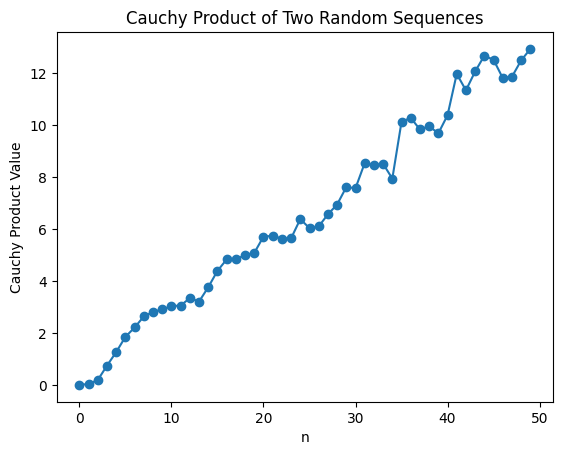

In [13]:
import numpy as np
import matplotlib.pyplot as plt


def random_generator_1():
    while True:
        yield np.random.uniform(0, 1)


def random_generator_2():
    while True:
        yield np.random.uniform(0, 1)


def cauchy_product(gen1, gen2):
    seq1, seq2 = [], []
    while True:
        seq1.append(next(gen1))
        seq2.append(next(gen2))
        yield sum(seq1[i] * seq2[-i-1] for i in range(len(seq1)))


def show_values(values):
    plt.plot(values, marker='o', linestyle='-')
    plt.xlabel("n")
    plt.ylabel("Cauchy Product Value")
    plt.title("Cauchy Product of Two Random Sequences")
    plt.show()

gen1 = random_generator_1()
gen2 = random_generator_2()
cauchy_gen = cauchy_product(gen1, gen2)

values = [next(cauchy_gen) for _ in range(50)]
show_values(values)

## Task 4
Write generator function, which yields a random sequence imitating a random walk. For example, it can resemble a stock exchange or currency exchange time series data.

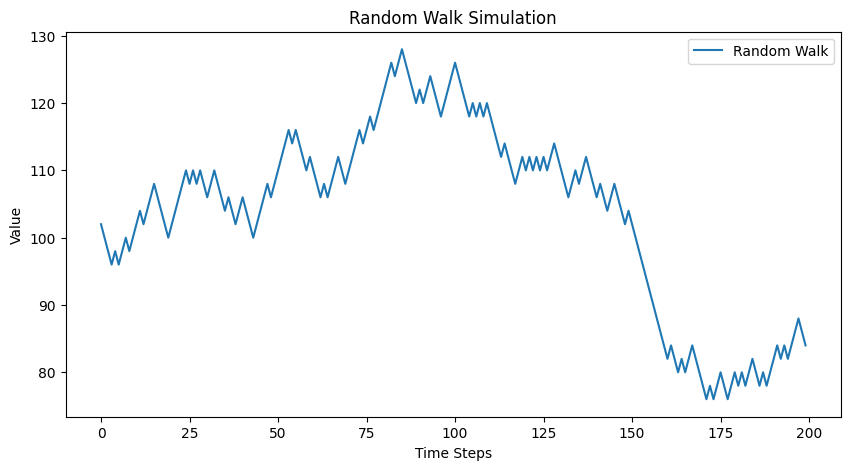

In [8]:
import random
import matplotlib.pyplot as plt


def random_walk(start=100, steps=100, step_size=1):
    value = start
    for _ in range(steps):
        value += random.choice([-step_size, step_size])
        yield value


def show_walk(walk):
    plt.figure(figsize=(10,5))
    plt.plot(walk, label="Random Walk")
    plt.xlabel("Time Steps")
    plt.ylabel("Value")
    plt.title("Random Walk Simulation")
    plt.legend()
    plt.show()


steps = 200
walk = list(random_walk(start=100, steps=steps, step_size=2))
show_walk(walk)

## Task 5

Given three different compounds $A,B,C$, total volume $N$ and step $k$. Write generator function, which yields all possible distributions of $A,B,C$ volumes with given step (in any order). For example, N = 100, k = 1. The outputs of the generator should be:
1. [0,0,100]
2. [0,1,99]
3. [0,2,98]
4. ...  

In [9]:
from itertools import product


def volume_distributions(N, k):
    for a in range(0, N + 1, k):
        for b in range(0, N - a + 1, k):
            c = N - a - b
            yield [a, b, c]


N = 100
k = 1

gen = volume_distributions(N, k)
for distribution in gen:
    print(distribution)

[0, 0, 100]
[0, 1, 99]
[0, 2, 98]
[0, 3, 97]
[0, 4, 96]
[0, 5, 95]
[0, 6, 94]
[0, 7, 93]
[0, 8, 92]
[0, 9, 91]
[0, 10, 90]
[0, 11, 89]
[0, 12, 88]
[0, 13, 87]
[0, 14, 86]
[0, 15, 85]
[0, 16, 84]
[0, 17, 83]
[0, 18, 82]
[0, 19, 81]
[0, 20, 80]
[0, 21, 79]
[0, 22, 78]
[0, 23, 77]
[0, 24, 76]
[0, 25, 75]
[0, 26, 74]
[0, 27, 73]
[0, 28, 72]
[0, 29, 71]
[0, 30, 70]
[0, 31, 69]
[0, 32, 68]
[0, 33, 67]
[0, 34, 66]
[0, 35, 65]
[0, 36, 64]
[0, 37, 63]
[0, 38, 62]
[0, 39, 61]
[0, 40, 60]
[0, 41, 59]
[0, 42, 58]
[0, 43, 57]
[0, 44, 56]
[0, 45, 55]
[0, 46, 54]
[0, 47, 53]
[0, 48, 52]
[0, 49, 51]
[0, 50, 50]
[0, 51, 49]
[0, 52, 48]
[0, 53, 47]
[0, 54, 46]
[0, 55, 45]
[0, 56, 44]
[0, 57, 43]
[0, 58, 42]
[0, 59, 41]
[0, 60, 40]
[0, 61, 39]
[0, 62, 38]
[0, 63, 37]
[0, 64, 36]
[0, 65, 35]
[0, 66, 34]
[0, 67, 33]
[0, 68, 32]
[0, 69, 31]
[0, 70, 30]
[0, 71, 29]
[0, 72, 28]
[0, 73, 27]
[0, 74, 26]
[0, 75, 25]
[0, 76, 24]
[0, 77, 23]
[0, 78, 22]
[0, 79, 21]
[0, 80, 20]
[0, 81, 19]
[0, 82, 18]
[0, 83, 17]
[